# OCR extraction with `Tesseract`
`Tesseract` is a [powerful open-source OCR tool](https://nanonets.com/blog/ocr-with-tesseract/). However, it takes some acrobatics to extract the data from the form-tables.

In [1]:
import os
import numpy as np
import pandas as pd
import pytesseract as ts
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
from scripts import prep, utils

In [3]:
def extract(imgarr: np.array, lang: str = 'eng+fre', mode: int = 3) -> pd.DataFrame:
    """
    extract text along with layout features (position on the page) in a data-frame format
    language may be single like `eng` or multi like `eng+fre+spa`
    modes: 3 (default) auto-segmentation, 6 assume uniform block, 11 find sparse text
    """
    data = pd.DataFrame()
    try:
        data = pd.DataFrame.from_dict(ts.image_to_data(imgarr, lang=lang,
                                                       config=f'--psm {mode}',
                                                       output_type=ts.Output.DICT))
    except Exception as e:
        print(f'Failed text extraction: {e}')
        return data
    # we only looking into a single page data in this notebook
    return data.drop('page_num', axis=1)
    

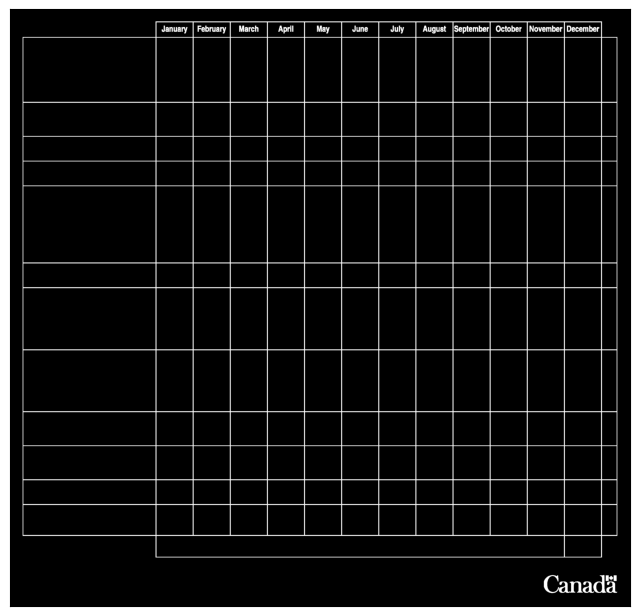

,level,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,2371,73,10,19,0,-
6,5,1,1,2,1,2340,67,30,25,33,B
8,5,1,1,3,1,2315,73,22,19,63,=
10,5,1,1,4,1,2299,73,15,19,28,o
12,5,1,1,5,1,2284,73,14,19,63,o
14,5,1,1,6,1,2269,73,14,19,66,Ly
16,5,1,1,7,1,2250,67,18,25,92,a
18,5,1,1,8,1,2190,67,42,25,11,Fs
20,5,1,1,9,1,2150,73,38,19,0,&
22,5,1,1,10,1,2135,73,15,19,96,>


In [4]:
imgarr = prep.img_load('./data/prepped/cnd-t1ovpsen-3.png')
utils.img_show(imgarr, figsize=(8, 8))

# run full-image extraction
data = extract(imgarr)
data[data['text']!='']

As we can see the reading didn't went well for this image. (Using sparse-text `mode = 11` wouldn't help either.) Let's try to read the header and the footer areas (clips) where in our case we know the important information should be present.

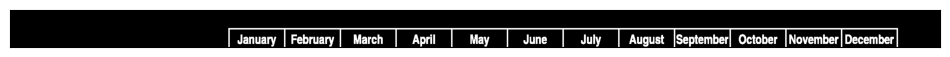

,level,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,0,0,0,0,0,0,2505,100,-1,
1,2,1,0,0,0,613,63,1768,37,-1,
2,3,1,1,0,0,613,63,1768,37,-1,
3,4,1,1,1,0,613,63,1768,37,-1,
4,5,1,1,1,1,613,67,104,32,96,January
5,5,1,1,1,2,732,63,16,37,94,|
6,5,1,1,1,3,758,67,115,32,88,February
7,5,1,1,1,4,889,63,13,37,88,|
8,5,1,1,1,5,926,67,78,25,95,March
9,5,1,1,1,6,1084,63,61,37,96,April


In [5]:
# run extraction from the doc-header clip
utils.img_show(imgarr[:100,:], figsize=(12, 12))
extract(imgarr[:100,:])

We've got a much better result. However, the outcome deteriorates with the bigger area introducing more outlines. Let's check if we can improve the full-image reading quality by removing table outlines.

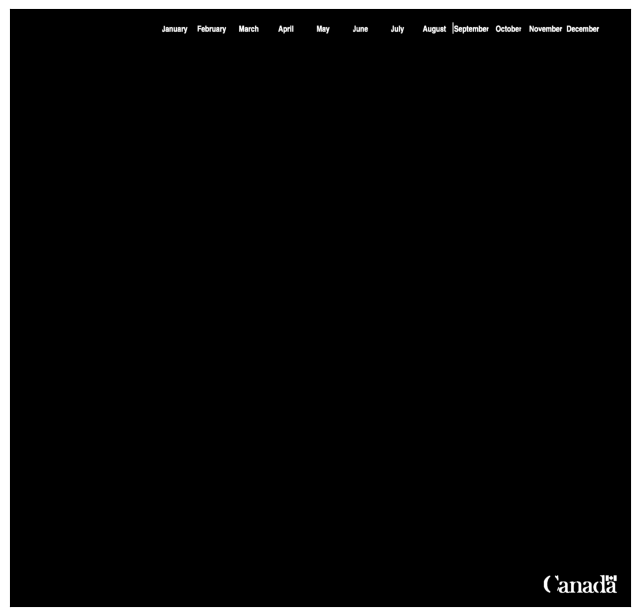

,level,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,615,68,102,31,83,January
5,5,1,1,1,2,758,67,115,32,60,February
6,5,1,1,1,3,926,67,78,25,60,March
7,5,1,1,1,4,1080,63,65,40,94,April
8,5,1,1,1,5,1240,67,51,32,96,May
9,5,1,1,1,6,1386,67,60,26,96,June
10,5,1,1,1,7,1540,67,52,32,96,July
11,5,1,1,1,8,1668,63,94,41,96,August
12,5,1,1,1,9,1788,50,146,54,69,|September
13,5,1,1,1,10,1963,66,103,27,93,October


In [6]:
output = utils.remove_outlines(imgarr)
utils.img_show(output, figsize=(8,8))

# run full-image extract with outlines removed
data = extract(output)
data[data['text']!='']

The presence of outlines affects the reading -- Doc-A should know when and how to focus on the areas of importance (read the clips). We need a map for that kind of extraction.

Note: `tesseract` provides `image_to_boxes` method to obtain bounding boxes -- we use `Open-CV` to compare the outcomes.

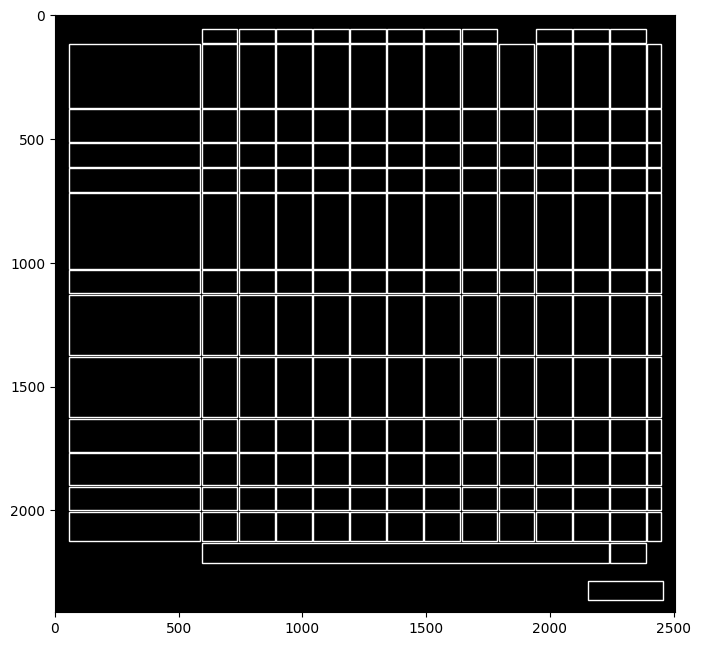

In [7]:
# extract cells which are biger than average relative print-height
boxes = utils.extract_outlines(imgarr, min_height=50)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.zeros(imgarr.shape), cmap='gray')
ax = utils.add_outlines(ax, boxes.values, edgecolor='white')
plt.show()

In [8]:
# read each cell separately -- just curious...
for box in boxes.values:
    x,y,w,h = box
    content = ts.image_to_string(imgarr[y:y+h,x:x+w])
    if content != '':
        print(content.strip())

December
November
October
August
July
June
May
April
March
February
January


In [9]:
# top header
ts.image_to_string(imgarr[:100,:]).strip()

'January | February | March April May June July August |September| October |November|December'

`Tesseract API` provides quite a menu of page segmentation modes if we want to run OCR on a clipped area.
The default is a fully automatic page segmentation without OSD. Let's explore that (we already done OSD as part of normalization).
 
## `Tesseract` layout features
Using `tesseract.Output.DICT` option we get OCR reading with hierarchy of bounding boxes. Let's explore that.

#### Text size and positioning

In [10]:
# props for bounding boxes
LAYOUT = utils.LAYOUT

In [11]:
# samples of IRS and Canadian blank tax-slips
examples = [str(x) for x in Path(f'./data/prepped').glob('*.png')]

data/prepped/cnd-t2sch73.fr-2.png


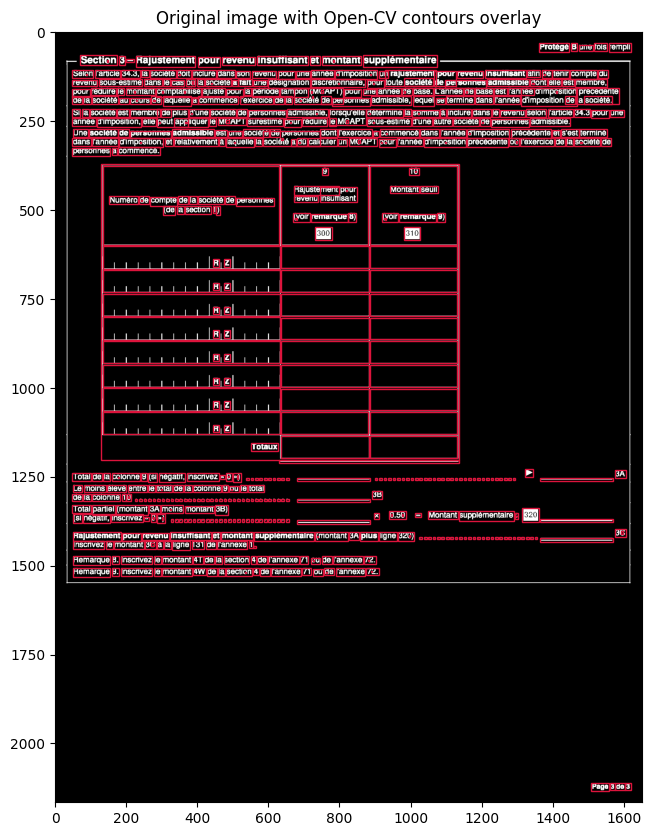

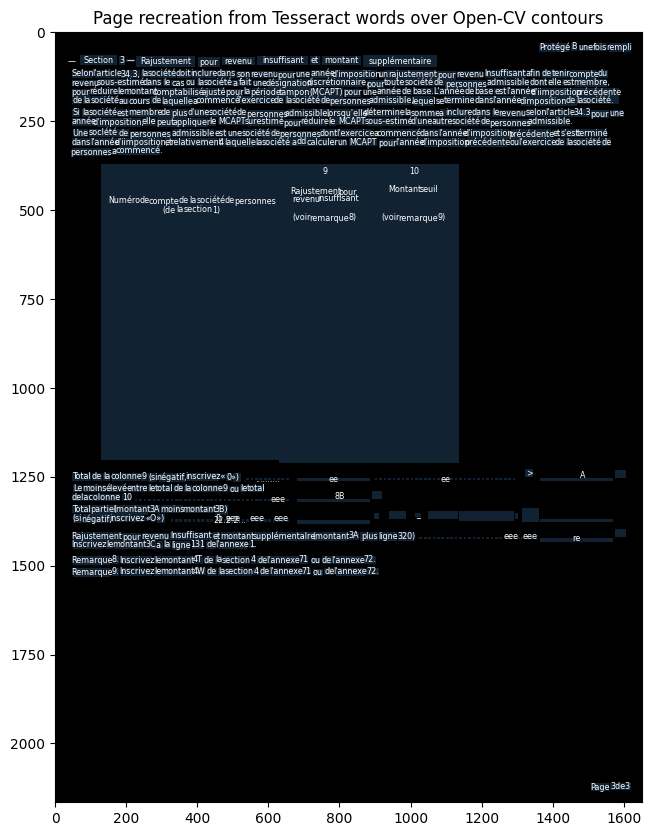

In [12]:
source = np.random.choice(examples)
#source = './data/prepped/cnd-LM6Ven-0.png'
print(source)
imgarr = prep.img_load(source)
height, width = imgarr.shape

# tesseract extract text
data = extract(imgarr)
# cv2 extract outlines down to the word-size
boxes = utils.extract_outlines(imgarr)

# compare original with recreation based on extracted
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(imgarr, cmap='gray')
ax.set_title('Original image with Open-CV contours overlay')
utils.add_outlines(ax, boxes[LAYOUT].values, edgecolor='crimson')
plt.show()

words = data[data['conf'] > 0.75]
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.zeros(imgarr.shape), cmap='gray')
ax.set_title('Page recreation from Tesseract words over Open-CV contours')
utils.add_outlines(ax, boxes[LAYOUT].values, edgecolor='none', facecolor='#123')
utils.add_text(ax, words[LAYOUT + ['text']].values)
plt.show()

Observation: text size detection comes out quite noisy.

#### Layout blocks hierarchy
Finally, let's evaluate `tesseract`-extracted hierarchy of text aggregation blocks.

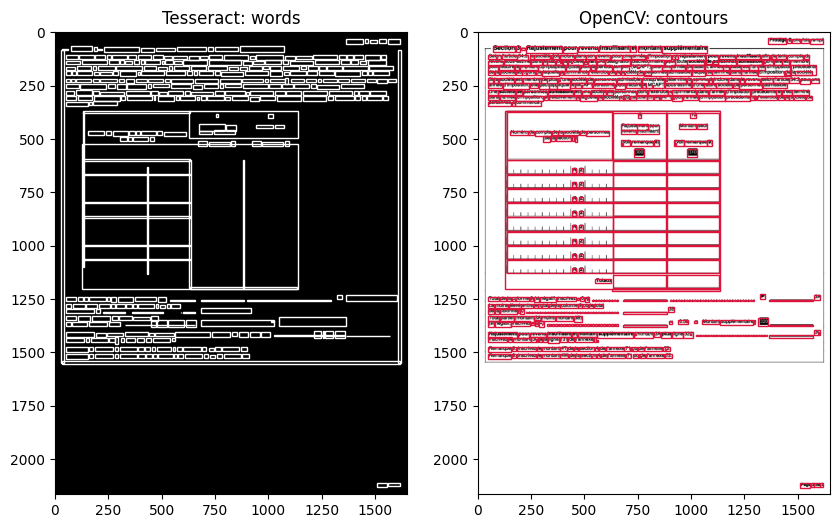

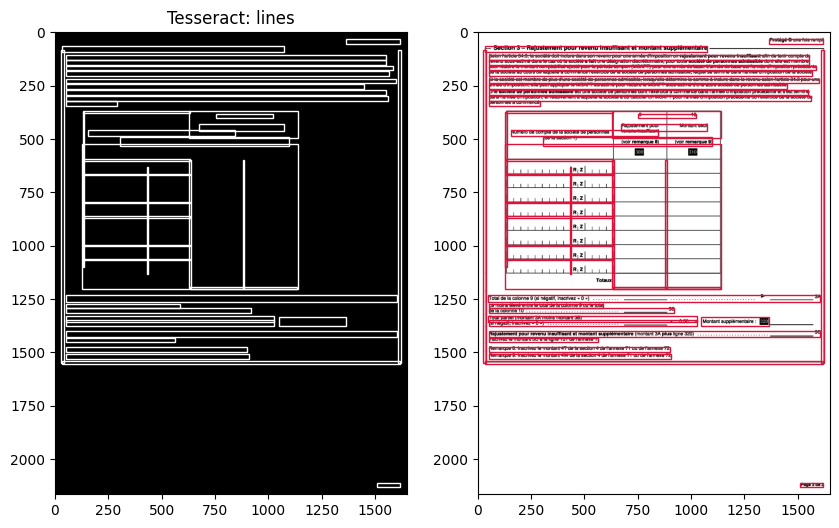

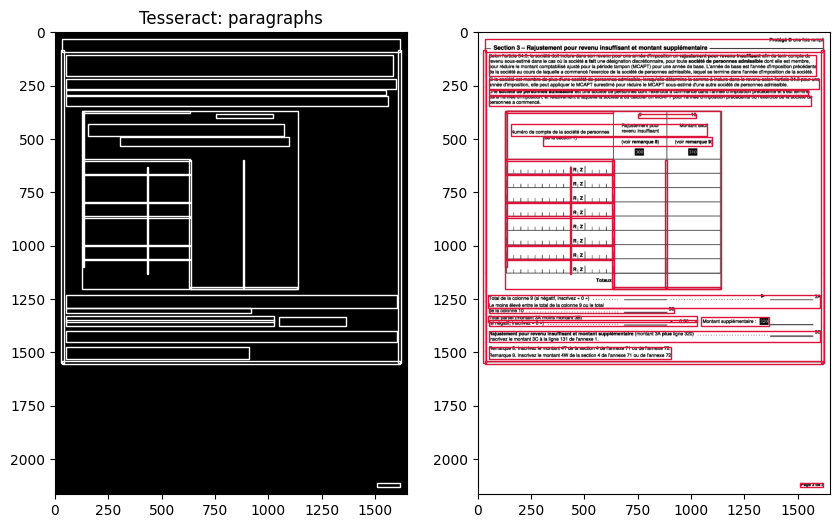

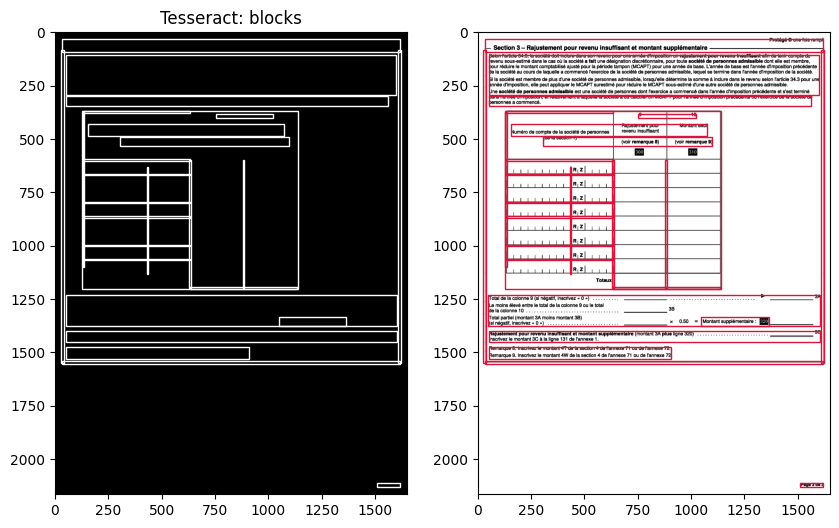

In [13]:
aspect_ratio = height / width

fig, ax = plt.subplots(1, 2, figsize=(10, 5 * aspect_ratio))
ax[0].imshow(np.zeros(imgarr.shape), cmap='gray')
utils.add_outlines(ax[0], data[data['level']==5][LAYOUT].values)
ax[0].set_title('Tesseract: words')
ax[1].imshow(255 - imgarr, cmap='gray')
ax[1].set_title('OpenCV: contours')
ax[1] = utils.add_outlines(ax[1], boxes.values, edgecolor='crimson')
plt.show()

for level in range(4,1,-1):
    aggr = ['','page','blocks','paragraphs','lines','words'][level]
    fig, ax = plt.subplots(1, 2, figsize=(10, 5 * aspect_ratio))
    ax[0].imshow(np.zeros(imgarr.shape), cmap='gray')
    ax[0].set_title(f'Tesseract: {aggr}')
    utils.add_outlines(ax[0], data[data['level']==level][LAYOUT].values)
    ax[1].imshow(255 - imgarr, cmap='gray')
    ax[1] = utils.add_outlines(ax[1], data.loc[data['level']==level,LAYOUT].values, edgecolor='crimson')
    plt.show()
    

For our project we take original `cv2-localization` in addition to `tesseract-layout`: to have better capture for some features like logos, tables, check-boxes, etc.